In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

normal_data=pd.read_csv("../input/insdn-dataset/Normal_data.csv")
metasploti_data=pd.read_csv("../input/insdn-dataset/OVS.csv")
ovs_data=pd.read_csv("../input/insdn-dataset/metasploitable-2.csv")

In [3]:
print("Start Time ", datetime.now())

Start Time  2024-02-09 11:02:06.999110


In [4]:
frames=[normal_data,metasploti_data,ovs_data]
data=pd.concat(frames,ignore_index=True)

In [5]:
data.Label = data.Label.str.replace(' ', '')
print(data.Label.unique())

['Normal' 'BFA' 'DDoS' 'DoS' 'Probe' 'Web-Attack' 'BOTNET' 'U2R']


In [6]:
data=data.loc[:, (data != 0).any(axis=0)]

In [7]:
data3 = data.loc[:, data.columns.difference(['Flow ID', 'Src IP','Dst IP','Timestamp','Src Port','Dst Port','Protocol'])]
data3=data3.sample(frac=1, replace=True, random_state=3).reset_index(drop=True)
data3.head()

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,Bwd IAT Min,Bwd IAT Std,...,SYN Flag Cnt,Subflow Bwd Byts,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt
0,0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
1,0,0.0,0.0,0.0,0.0,40,2485.0,2485.0,2485.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
2,0,0.0,0.0,0.0,0.0,0,1.0,1.0,1.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
3,1,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.00000,...,0,0,1,248,2,1,2,0.0,248.0,0
4,0,0.0,0.0,0.0,0.0,144,167136.0,115976.2,2573.0,72264.35192,...,1,3510,6,370,7,6,7,3510.0,370.0,0


In [8]:
data3.Label.replace(['U2R','BFA','DDoS','DoS','Probe','Web-Attack','BOTNET'],'Saldiri',inplace=True)
data3.Label.replace("Saldiri","1",inplace=True)
data3.Label.replace("Normal","0",inplace=True)
data3.Label.unique()
data3.Label

0         1
1         1
2         1
3         0
4         0
         ..
343884    1
343885    1
343886    1
343887    1
343888    1
Name: Label, Length: 343889, dtype: object

In [9]:
b=data3.columns
for i in b:
    print(i)

ACK Flag Cnt
Active Max
Active Mean
Active Min
Active Std
Bwd Header Len
Bwd IAT Max
Bwd IAT Mean
Bwd IAT Min
Bwd IAT Std
Bwd IAT Tot
Bwd PSH Flags
Bwd Pkt Len Max
Bwd Pkt Len Mean
Bwd Pkt Len Min
Bwd Pkt Len Std
Bwd Pkts/s
Bwd Seg Size Avg
Bwd URG Flags
Down/Up Ratio
FIN Flag Cnt
Flow Byts/s
Flow Duration
Flow IAT Max
Flow IAT Mean
Flow IAT Min
Flow IAT Std
Flow Pkts/s
Fwd Act Data Pkts
Fwd Header Len
Fwd IAT Max
Fwd IAT Mean
Fwd IAT Min
Fwd IAT Std
Fwd IAT Tot
Fwd Pkt Len Max
Fwd Pkt Len Mean
Fwd Pkt Len Min
Fwd Pkt Len Std
Fwd Pkts/s
Fwd Seg Size Avg
Idle Max
Idle Mean
Idle Min
Idle Std
Init Bwd Win Byts
Init Fwd Win Byts
Label
PSH Flag Cnt
Pkt Len Max
Pkt Len Mean
Pkt Len Min
Pkt Len Std
Pkt Len Var
Pkt Size Avg
RST Flag Cnt
SYN Flag Cnt
Subflow Bwd Byts
Subflow Bwd Pkts
Subflow Fwd Byts
Subflow Fwd Pkts
Tot Bwd Pkts
Tot Fwd Pkts
TotLen Bwd Pkts
TotLen Fwd Pkts
URG Flag Cnt


In [10]:
X=data3[["ACK Flag Cnt",
"Active Max",
"Active Mean",
"Active Min",
"Active Std",
"Bwd Header Len",
"Bwd IAT Max",
"Bwd IAT Mean",
"Bwd IAT Min",
"Bwd IAT Std",
"Bwd IAT Tot",
"Bwd Pkt Len Max",
"Bwd Pkt Len Min",
"Bwd Pkt Len Std",
"Bwd Pkts/s",
"Down/Up Ratio",
"FIN Flag Cnt",
"Flow Byts/s",
"Flow Duration",
"Flow IAT Max",
"Flow IAT Mean",
"Flow IAT Min",
"Flow IAT Std",
"Flow Pkts/s",
"Fwd Act Data Pkts",
"Fwd Header Len",
"Fwd IAT Max",
"Fwd IAT Mean",
"Fwd IAT Min",
"Fwd IAT Std",
"Fwd IAT Tot",
"Fwd Pkt Len Max",
"Fwd Pkt Len Min",
"Fwd Pkt Len Std",
"Fwd Pkts/s",
"Idle Mean",
"Idle Min",
"Idle Std",
"Init Bwd Win Byts",
"Pkt Len Max",
"Pkt Len Mean",
"Pkt Len Min",
"Pkt Len Std",
"Pkt Len Var",
"Pkt Size Avg",
"RST Flag Cnt",
"SYN Flag Cnt",
"Subflow Fwd Byts",
"TotLen Bwd Pkts",
"TotLen Fwd Pkts"]]
y=data3.Label
print(X.shape)
print(y.shape)

(343889, 50)
(343889,)


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.61274543, -0.08794361, -0.07798864, ..., -0.00868589,
        -0.02986419, -0.00868047],
       [-0.61274543, -0.08794361, -0.07798864, ..., -0.00868589,
        -0.02986419, -0.00868047],
       [-0.61274543, -0.08794361, -0.07798864, ..., -0.00868589,
        -0.02986419, -0.00868047],
       ...,
       [ 1.6319991 , -0.08534712, -0.07408992, ..., -0.00838301,
        -0.02974601, -0.00837789],
       [-0.61274543, -0.08794361, -0.07798864, ..., -0.00868589,
        -0.02986419, -0.00868047],
       [ 1.6319991 , -0.08794361, -0.07798864, ..., -0.00868589,
        -0.02986419, -0.00868047]])

In [12]:
y= pd.get_dummies(y, drop_first=True)
y=y["1"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=1)

In [13]:
#set up plotting area
plt.figure(0).clf()

<Figure size 640x480 with 0 Axes>

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.996778058227583

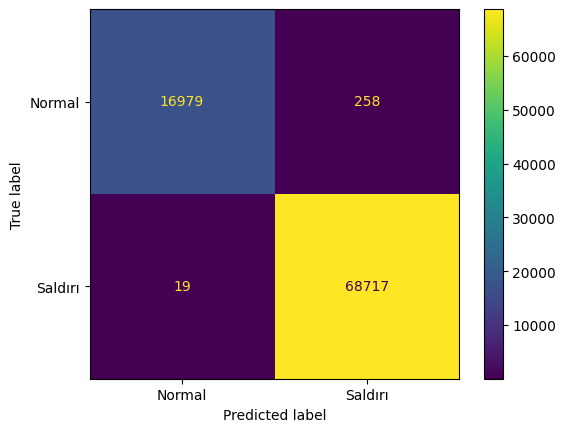

In [15]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()

In [16]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     17237
           1       1.00      1.00      1.00     68736

    accuracy                           1.00     85973
   macro avg       1.00      0.99      0.99     85973
weighted avg       1.00      1.00      1.00     85973



In [17]:
def rocMatrix(model):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    import sklearn.metrics as metrics
    # predict probabilities for test set
    yhat_probs = model.predict(X_test, verbose=0)
    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]

    # ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc) 

    fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_probs)
    m_auc = metrics.roc_auc_score(y_test, yhat_probs)

    #ROC CURVE
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, 'b', marker='.', label = 'Model = %0.3f' % auc )

    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    print("----------------------------------------")

In [18]:
#sınıflamanın tüm eşikleri için FPR ve TPR’yi hesaplar!
#probs = model.predict_proba(X_test)
#probs = probs[:, 1]
#print(probs)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
#m_auc = metrics.roc_auc_score(y_test, probs)

#ROC CURVE
#plt.title('ROC Curve')
#plt.plot([0, 1], [0, 1], linestyle='--')
#plt.plot(fpr, tpr, 'b', marker='.', label = 'LR = %0.3f' % m_auc )

#plt.legend(loc = 'lower right')
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

y_pred = model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, y_pred)
auc_lr = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_lr)

ROC AUC: 0.998900


In [19]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100,learning_rate=0.5,n_jobs=4)
model.fit(X_train, y_train, 
             early_stopping_rounds=500, 
             eval_set=[(X_test, y_test)],
             verbose=False)

#pred=model.predict(X_test)
print("----- XGBoost ------")
print(model.score(X_test,y_test))
print("----- XGBoost ------")

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


----- XGBoost ------
0.999941842206274
----- XGBoost ------


In [20]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17237
           1       1.00      1.00      1.00     68736

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973



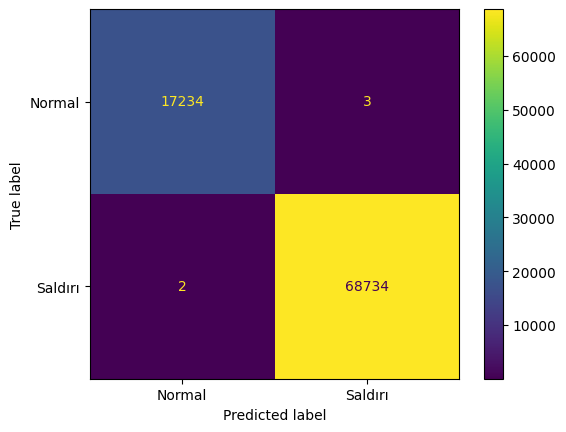

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()

In [22]:
y_pred = model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred)
auc_xgb = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_xgb)

ROC AUC: 1.000000


In [23]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- Random Forest ------")
print(model.score(X_test,y_test))
print("----- Random Forest ------")

----- Random Forest ------
0.9999185790887837
----- Random Forest ------


In [24]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17237
           1       1.00      1.00      1.00     68736

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973



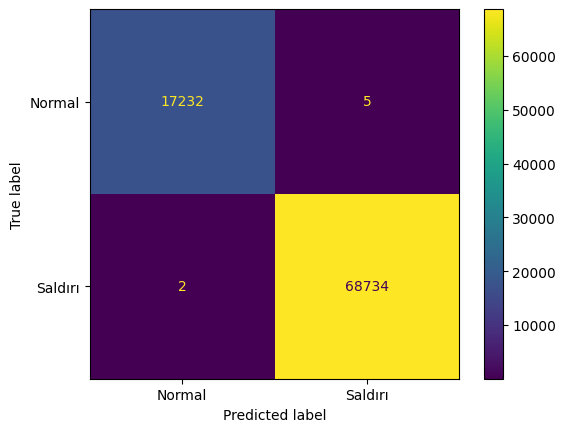

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()

In [26]:
y_pred = model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred)
auc_rf = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_rf)

ROC AUC: 1.000000


In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(splitter="best",criterion="entropy",random_state=0)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- DecisionTreeRegressor ------")
print(model.score(X_test,y_test))
print("----- DecisionTreeRegressor ------")

----- DecisionTreeRegressor ------
0.9999185790887837
----- DecisionTreeRegressor ------


In [28]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17237
           1       1.00      1.00      1.00     68736

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973



In [29]:
y_pred = model.predict_proba(X_test)[:, 1]
fpr_dst, tpr_dst, _ = metrics.roc_curve(y_test, y_pred)
auc_dst = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_dst)

ROC AUC: 0.999900


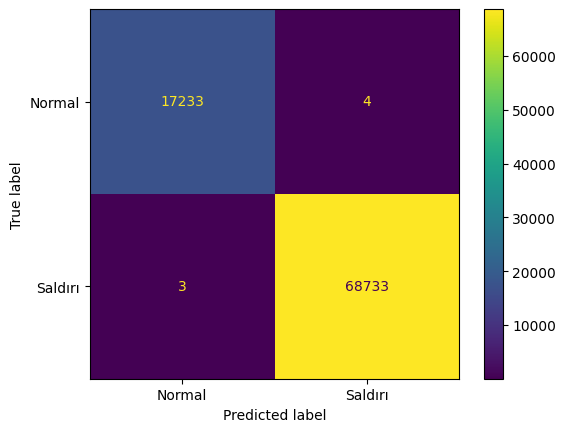

In [30]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()

In [31]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,weights='uniform')
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- KNN ------")
print(model.score(X_test,y_test))
print("----- KNN ------")

----- KNN ------
0.9997906319425867
----- KNN ------


In [32]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17237
           1       1.00      1.00      1.00     68736

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973



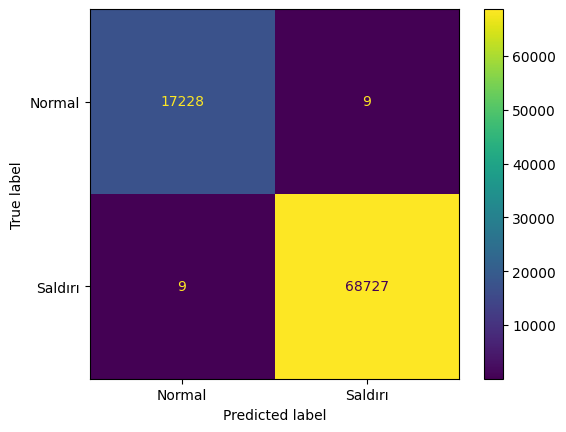

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()

In [34]:
y_pred = model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, y_pred)
auc_knn = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_knn)

ROC AUC: 0.999800


In [35]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print(model.score(X_test,y_test))
#print(mean_absolute_error(y_test,pred))

0.9989880543891687


In [36]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17237
           1       1.00      1.00      1.00     68736

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973



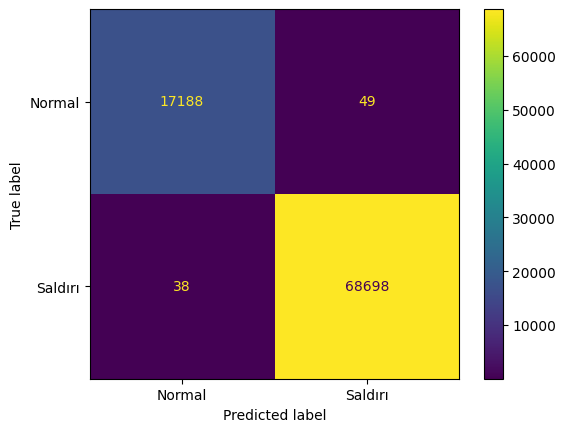

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()

In [38]:
y_pred = model.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, _ = metrics.roc_curve(y_test, y_pred)
auc_adaboost = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_adaboost) 

ROC AUC: 1.000000


In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import  Embedding, SimpleRNN, LSTM,Masking,Bidirectional
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.models import model_from_json,model_from_yaml,load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence,text
from sklearn.preprocessing import LabelEncoder
from keras import metrics, regularizers
from keras.optimizers import RMSprop,Adam
from keras import backend as K
import sklearn.metrics as metrics

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(257916, 50)
(85973, 50)
(257916,)
(85973,)


In [41]:
# Model için gerekli değerler
#epochs_sayisi=5
batch_size=512
# Çıktı gözükmemesi için
verbose=1
validation_split=0.1
max_len=len(X.columns)
vocab_size=10000
epoch_sayisi=5

Epoch 1/5
454/454 [==============================] - 91s 187ms/step - loss: 0.4962 - acc: 0.9594 - val_loss: 0.1096 - val_acc: 0.9915
Epoch 2/5
454/454 [==============================] - 81s 178ms/step - loss: 0.0912 - acc: 0.9905 - val_loss: 0.0622 - val_acc: 0.9917
Epoch 3/5
454/454 [==============================] - 81s 178ms/step - loss: 0.0569 - acc: 0.9921 - val_loss: 0.0491 - val_acc: 0.9940
Epoch 4/5
454/454 [==============================] - 82s 180ms/step - loss: 0.0479 - acc: 0.9923 - val_loss: 0.0360 - val_acc: 0.9951
Epoch 5/5
454/454 [==============================] - 81s 179ms/step - loss: 0.0436 - acc: 0.9932 - val_loss: 0.0474 - val_acc: 0.9922
Model evaluate
Test loss: 0.046197690069675446
Test accuracy: 0.9926372170448303
Model evaluate


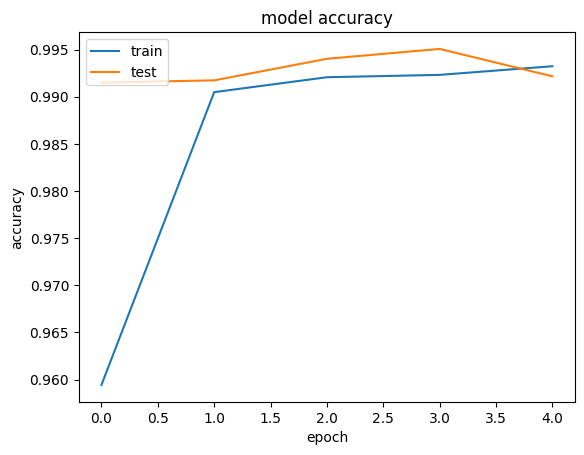

-----------------Classification Report -----------------------
2687/2687 [==============================] - 44s 16ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17237
           1       0.99      1.00      1.00     68736

    accuracy                           0.99     85973
   macro avg       0.99      0.99      0.99     85973
weighted avg       0.99      0.99      0.99     85973

----------------------------------------
ROC AUC: 0.995900
----------------------------------------


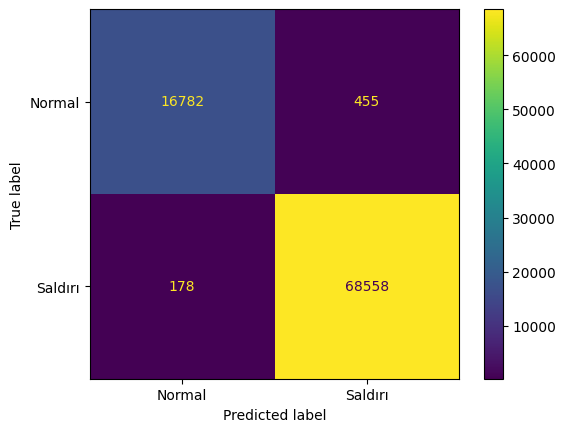

In [42]:

model=Sequential()
model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
model.add(SimpleRNN(40,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(24,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001), metrics=['acc'])
history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                  verbose=verbose,validation_split=validation_split)
print ("Model evaluate")
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
print ("Model evaluate")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("-----------------Classification Report -----------------------")
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

cm = confusion_matrix(y_test, y_pred.round()) 
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=["Normal","Saldırı"])
cm_display.plot()
print("----------------------------------------")


# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# ROC AUC
auc_rnn = round(roc_auc_score(y_test, yhat_probs),4)
print('ROC AUC: %f' % auc_rnn) 

fpr_rnn, tpr_rnn, thresholds = metrics.roc_curve(y_test, yhat_probs)
m_auc = metrics.roc_auc_score(y_test, yhat_probs)
print("----------------------------------------")


Epoch 1/5
454/454 [==============================] - 102s 215ms/step - loss: 0.5463 - acc: 0.8472 - val_loss: 0.1179 - val_acc: 0.9883
Epoch 2/5
454/454 [==============================] - 95s 209ms/step - loss: 0.1032 - acc: 0.9855 - val_loss: 0.0779 - val_acc: 0.9925
Epoch 3/5
454/454 [==============================] - 95s 209ms/step - loss: 0.0729 - acc: 0.9883 - val_loss: 0.0483 - val_acc: 0.9928
Epoch 4/5
454/454 [==============================] - 95s 208ms/step - loss: 0.0686 - acc: 0.9876 - val_loss: 0.0464 - val_acc: 0.9930
Epoch 5/5
454/454 [==============================] - 95s 209ms/step - loss: 0.0504 - acc: 0.9907 - val_loss: 0.0823 - val_acc: 0.9586
Model evaluate
Test loss: 0.08173146843910217
Test accuracy: 0.9587196111679077
Model evaluate


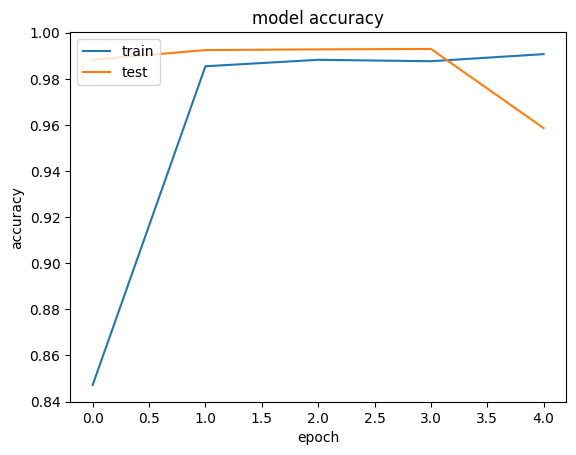

-----------------Classification Report -----------------------
2687/2687 [==============================] - 47s 17ms/step
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     17237
           1       0.96      0.99      0.97     68736

    accuracy                           0.96     85973
   macro avg       0.96      0.91      0.93     85973
weighted avg       0.96      0.96      0.96     85973

----------------------------------------
ROC AUC: 0.995500
----------------------------------------


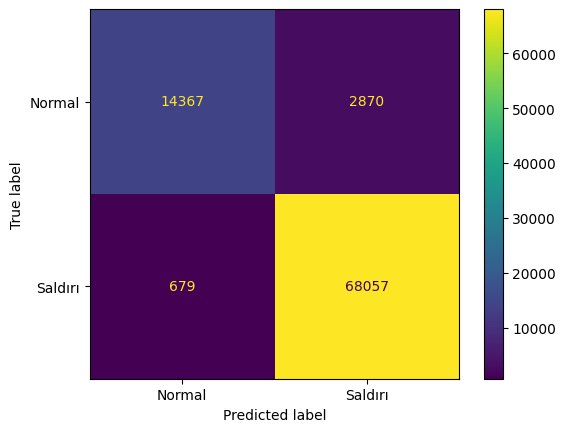

In [43]:
model=Sequential()
model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
model.add(LSTM(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                  verbose=verbose,validation_split=validation_split)
print ("Model evaluate")
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
print ("Model evaluate")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("-----------------Classification Report -----------------------")
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

cm = confusion_matrix(y_test, y_pred.round()) 
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=["Normal","Saldırı"])
cm_display.plot()
print("----------------------------------------")

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# ROC AUC
auc_lstm = round(roc_auc_score(y_test, yhat_probs),4)
print('ROC AUC: %f' % auc_lstm) 

fpr_lstm, tpr_lstm, thresholds = metrics.roc_curve(y_test, yhat_probs)
m_auc = metrics.roc_auc_score(y_test, yhat_probs)
print("----------------------------------------")


Epoch 1/5
454/454 [==============================] - 7s 10ms/step - loss: 0.5919 - acc: 0.8104 - val_loss: 0.4891 - val_acc: 0.8342
Epoch 2/5
454/454 [==============================] - 2s 5ms/step - loss: 0.4282 - acc: 0.8307 - val_loss: 0.4398 - val_acc: 0.8396
Epoch 3/5
454/454 [==============================] - 2s 5ms/step - loss: 0.4143 - acc: 0.8340 - val_loss: 0.4191 - val_acc: 0.8396
Epoch 4/5
454/454 [==============================] - 2s 5ms/step - loss: 0.4081 - acc: 0.8343 - val_loss: 0.4187 - val_acc: 0.8396
Epoch 5/5
454/454 [==============================] - 2s 5ms/step - loss: 0.4034 - acc: 0.8349 - val_loss: 0.4156 - val_acc: 0.8396
Model evaluate
Test loss: 0.4156934320926666
Test accuracy: 0.8395193815231323
Model evaluate


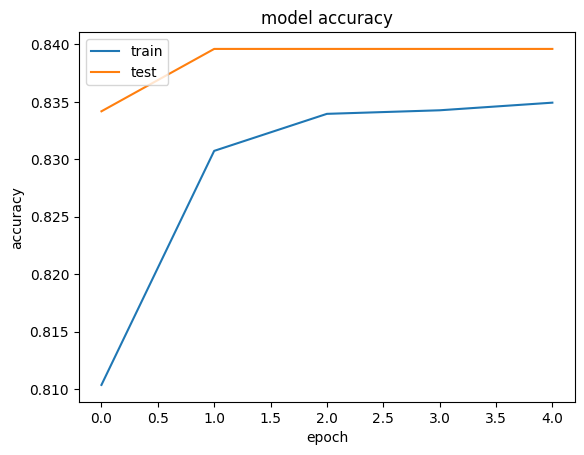

-----------------Classification Report -----------------------
2687/2687 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       0.81      0.26      0.40     17237
           1       0.84      0.98      0.91     68736

    accuracy                           0.84     85973
   macro avg       0.82      0.62      0.65     85973
weighted avg       0.83      0.84      0.80     85973

----------------------------------------
----------------------------------------


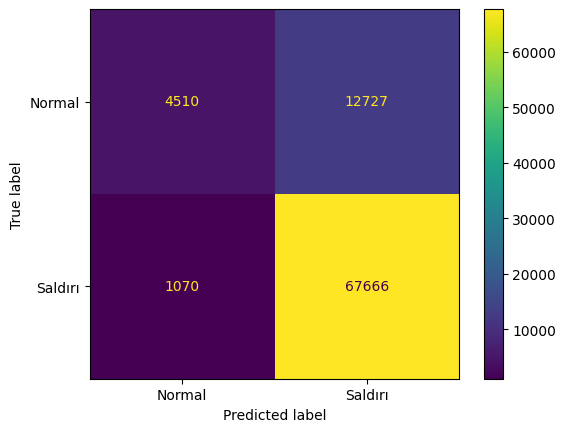

In [44]:
model=Sequential()
model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
model.add(Conv1D(32,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dropout(0.2))
model.add(Conv1D(16,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dropout(0.2))
model.add(Conv1D(4,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                  verbose=verbose,validation_split=validation_split)
print ("Model evaluate")
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
print ("Model evaluate")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


print("-----------------Classification Report -----------------------")
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

cm = confusion_matrix(y_test, y_pred.round()) 
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=["Normal","Saldırı"])
cm_display.plot()
print("----------------------------------------")

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# ROC AUC
auc_cnn = round(roc_auc_score(y_test, yhat_probs),4)
fpr_cnn, tpr_cnn, thresholds = metrics.roc_curve(y_test, yhat_probs)
m_auc = metrics.roc_auc_score(y_test, yhat_probs)
print("----------------------------------------")

Text(0.5, 0, 'False Positive')

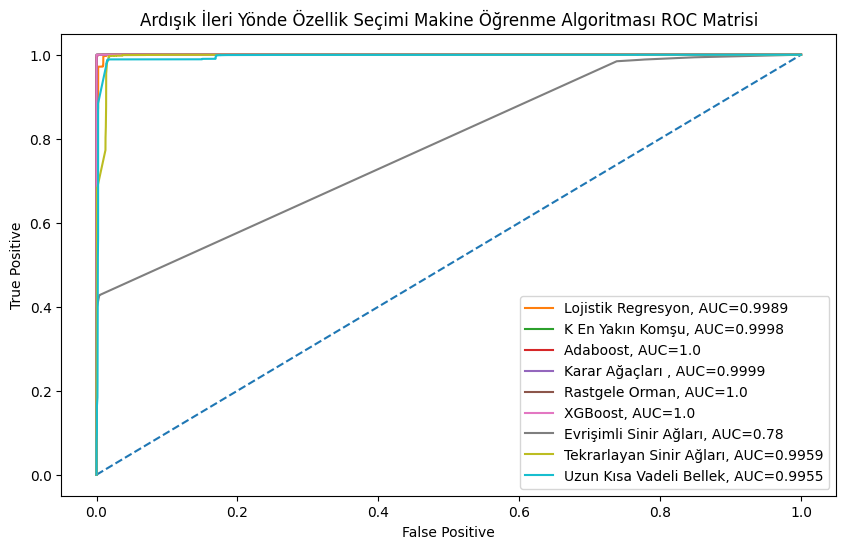

In [45]:
# ROC görselleştirme
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_lr,tpr_lr, label="Lojistik Regresyon, AUC="+str(auc_lr))
plt.plot(fpr_knn,tpr_knn, label="K En Yakın Komşu, AUC="+str(auc_knn))
plt.plot(fpr_adaboost,tpr_adaboost, label="Adaboost, AUC="+str(auc_adaboost))
plt.plot(fpr_dst,tpr_dst,label="Karar Ağaçları , AUC="+str(auc_dst))
plt.plot(fpr_rf,tpr_rf,label="Rastgele Orman, AUC="+str(auc_rf))
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, AUC="+str(auc_xgb))
plt.plot(fpr_cnn,tpr_cnn,label="Evrişimli Sinir Ağları, AUC="+str(auc_cnn))
plt.plot(fpr_rnn,tpr_rnn,label="Tekrarlayan Sinir Ağları, AUC="+str(auc_rnn))
plt.plot(fpr_lstm,tpr_lstm,label="Uzun Kısa Vadeli Bellek, AUC="+str(auc_lstm))
plt.title('Ardışık İleri Yönde Özellik Seçimi Makine Öğrenme Algoritması ROC Matrisi')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive')
plt.xlabel('False Positive')

In [46]:
print("Finish Time ", datetime.now())

Finish Time  2024-02-09 11:27:41.091109
